## PERFORMING DATA ANALYSIS AND FEATER ENGINEERING OF DATA SCIENCE SALARY PREDICTION 
## importing the SKlearn Libraries 


In [306]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer


In [307]:
df=pd.read_csv("ds_salaries.csv")

## breif stats of the data frame 

In [308]:


"""OVERAL STATICS OF THE DATA FRAME DATA SCIENTIST"""
def get_stats(df):
    return(
          "*******descriptive statics*******", df.describe(),
          "******* infofrmation of overalall data ******", df.info(),
          "*******Shape of the data*******",df.shape,
          "******null values in the data ********",df.isnull().sum(),
          "******First five rows of the data frame******",df.head(),
          "******* data frame value counts",df.value_counts()
        )
get_stats(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


('*******descriptive statics*******',
          work_year        salary  salary_in_usd  remote_ratio
 count  3755.000000  3.755000e+03    3755.000000   3755.000000
 mean   2022.373635  1.906956e+05  137570.389880     46.271638
 std       0.691448  6.716765e+05   63055.625278     48.589050
 min    2020.000000  6.000000e+03    5132.000000      0.000000
 25%    2022.000000  1.000000e+05   95000.000000      0.000000
 50%    2022.000000  1.380000e+05  135000.000000      0.000000
 75%    2023.000000  1.800000e+05  175000.000000    100.000000
 max    2023.000000  3.040000e+07  450000.000000    100.000000,
 '******* infofrmation of overalall data ******',
 None,
 '*******Shape of the data*******',
 (3755, 11),
 '******null values in the data ********',
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location   

## Feature Transformation of the data frame 


In [309]:
job_catageories = ["Data Scientist","Data Analys","Data Engineering","Machine learning engineering","Managment","constultant"]

In [310]:
data_Scientist="Data Scientist|Data Science|Applied Scientist|Scientist"
data_analyst="Data Analyst |Research|Research Analyst|Analytics|Analyst|Data Specialist|BI Developer|BI"
data_engineering="Data Engineering|Data Engineer|ELT|Data Architect|Data Modeler|Infrastructure|Cloud|Architect"
MLengineering="Machine Learning Engineer|AI|Computer Vision Engineer|MLOps Engineer|ML|Machine Learning Engineering|Machine Learning"
Managment="Data Management Specialist|Manager"
consultant = "Consultant|Freelance"


In [311]:
conditions=[
(df["job_title"].str.contains(data_Scientist)),
(df['job_title'].str.contains(data_analyst)),
(df["job_title"].str.contains(data_engineering)),
(df["job_title"].str.contains(MLengineering)),
(df["job_title"].str.contains(Managment)),
(df["job_title"].str.contains(consultant))
]

In [312]:
df["job_cat"]=np.select(conditions,job_catageories,default="others")


In [313]:
country_codes = {
    'AD': 'Andorra',
    'AE': 'United Arab Emirates',
    'AF': 'Afghanistan',
    'AG': 'Antigua & Barbuda',
    'AI': 'Anguilla',
    'AL': 'Albania',
    'AM': 'Armenia',
    'AN': 'Netherlands Antilles',
    'AO': 'Angola',
    'AQ': 'Antarctica',
    'AR': 'Argentina',
    'AS': 'American Samoa',
    'AT': 'Austria',
    'AU': 'Australia',
    'AW': 'Aruba',
    'AZ': 'Azerbaijan',
    'BA': 'Bosnia and Herzegovina',
    'BB': 'Barbados',
    'BD': 'Bangladesh',
    'BE': 'Belgium',
    'BF': 'Burkina Faso',
    'BG': 'Bulgaria',
    'BH': 'Bahrain',
    'BI': 'Burundi',
    'BJ': 'Benin',
    'BM': 'Bermuda',
    'BN': 'Brunei Darussalam',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BS': 'Bahama',
    'BT': 'Bhutan',
    'BU': 'Burma (no longer exists)',
    'BV': 'Bouvet Island',
    'BW': 'Botswana',
    'BY': 'Belarus',
    'BZ': 'Belize',
    'CA': 'Canada',
    'CC': 'Cocos (Keeling) Islands',
    'CF': 'Central African Republic',
    'CG': 'Congo',
    'CH': 'Switzerland',
    'CI': 'Côte D\'ivoire (Ivory Coast)',
    'CK': 'Cook Iislands',
    'CL': 'Chile',
    'CM': 'Cameroon',
    'CN': 'China',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CS': 'Czechoslovakia (no longer exists)',
    'CU': 'Cuba',
    'CV': 'Cape Verde',
    'CX': 'Christmas Island',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DD': 'German Democratic Republic (no longer exists)',
    'DE': 'Germany',
    'DJ': 'Djibouti',
    'DK': 'Denmark',
    'DM': 'Dominica',
    'DO': 'Dominican Republic',
    'DZ': 'Algeria',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'EH': 'Western Sahara',
    'ER': 'Eritrea',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FI': 'Finland',
    'FJ': 'Fiji',
    'FK': 'Falkland Islands (Malvinas)',
    'FM': 'Micronesia',
    'FO': 'Faroe Islands',
    'FR': 'France',
    'FX': 'France, Metropolitan',
    'GA': 'Gabon',
    'GB': 'United Kingdom (Great Britain)',
    'GD': 'Grenada',
    'GE': 'Georgia',
    'GF': 'French Guiana',
    'GH': 'Ghana',
    'GI': 'Gibraltar',
    'GL': 'Greenland',
    'GM': 'Gambia',
    'GN': 'Guinea',
     'GP': 'Guadeloupe',
    'GQ': 'Equatorial Guinea',
    'GR': 'Greece',
    'GS': 'South Georgia and the South Sandwich Islands',
    'GT': 'Guatemala',
    'GU': 'Guam',
    'GW': 'Guinea-Bissau',
    'GY': 'Guyana',
    'HK': 'Hong Kong',
    'HM': 'Heard & McDonald Islands',
    'HN': 'Honduras',
    'HR': 'Croatia',
    'HT': 'Haiti',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IO': 'British Indian Ocean Territory',
    'IQ': 'Iraq',
    'IR': 'Islamic Republic of Iran',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JO': 'Jordan',
    'JP': 'Japan',
    'KE': 'Kenya',
    'KG': 'Kyrgyzstan',
    'KH': 'Cambodia',
    'KI': 'Kiribati',
    'KM': 'Comoros',
    'KN': 'St. Kitts and Nevis',
    'KP': 'Korea, Democratic People\'s Republic of',
    'KR': 'Korea, Republic of',
    'KW': 'Kuwait',
    'KY': 'Cayman Islands',
    'KZ': 'Kazakhstan',
    'LA': 'Lao People\'s Democratic Republic',
    'LB': 'Lebanon',
    'LC': 'Saint Lucia',
    'LI': 'Liechtenstein',
    'LK': 'Sri Lanka',
    'LR': 'Liberia',
    'LS': 'Lesotho',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'LY': 'Libyan Arab Jamahiriya',
    'MA': 'Morocco',
    'MC': 'Monaco',
    'MD': 'Moldova, Republic of',
    'MG': 'Madagascar',
    'MH': 'Marshall Islands',
    'ML': 'Mali',
    'MN': 'Mongolia',
    'MM': 'Myanmar',
    'MO': 'Macau',
    'MP': 'Northern Mariana Islands',
    'MQ': 'Martinique',
    'MR': 'Mauritania',
    'MS': 'Monserrat',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MV': 'Maldives',
    'MW': 'Malawi',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'MZ': 'Mozambique',
    'NA': 'Namibia',
    'NC': 'New Caledonia',
    'NE': 'Niger',
    'NF': 'Norfolk Island',
    'NG': 'Nigeria',
    'NI': 'Nicaragua',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NP': 'Nepal',
    'NR': 'Nauru',
    'NT': 'Neutral Zone (no longer exists)',
    'NU': 'Niue',
    'NZ': 'New Zealand',
    'OM': 'Oman',
    'PA': 'Panama',
    'PE': 'Peru',
    'PF': 'French Polynesia',
    'PG': 'Papua New Guinea',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PM': 'St. Pierre & Miquelon',
    'PN': 'Pitcairn',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'PW': 'Palau',
    'PY': 'Paraguay',
    'QA': 'Qatar',
    'RE': 'Réunion',
    'RO': 'Romania',
    'RU': 'Russian Federation',
    'RW': 'Rwanda',
    'SA': 'Saudi Arabia',
    'SB': 'Solomon Islands',
    'SC': 'Seychelles',
    'SD': 'Sudan',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SH': 'St. Helena',
    'SI': 'Slovenia',
    'SJ': 'Svalbard & Jan Mayen Islands',
    'SK': 'Slovakia',
    'SL': 'Sierra Leone',
    'SM': 'San Marino',
    'SN': 'Senegal',
    'SO': 'Somalia',
    'SR': 'Suriname',
    'ST': 'Sao Tome & Principe',
    'SU': 'Union of Soviet Socialist Republics (no longer exists)',
    'SV': 'El Salvador',
    'SY': 'Syrian Arab Republic',
    'SZ': 'Swaziland',
    'TC': 'Turks & Caicos Islands',
    'TD': 'Chad',
    'TF': 'French Southern Territories',
    'TG': 'Togo',
    'TH': 'Thailand',
    'TJ': 'Tajikistan',
    'TK': 'Tokelau',
    'TM': 'Turkmenistan',
    'TN': 'Tunisia',
    'TO': 'Tonga',
    'TP': 'East Timor',
    'TR': 'Turkey',
    'TT': 'Trinidad & Tobago',
    'TV': 'Tuvalu',
    'TW': 'Taiwan, Province of China',
    'TZ': 'Tanzania, United Republic of',
    'UA': 'Ukraine',
    'UG': 'Uganda',
    'UM': 'United States Minor Outlying Islands',
    'US': 'United States of America',
    'UY': 'Uruguay',
    'UZ': 'Uzbekistan',
    'VA': 'Vatican City State (Holy See)',
    'VC': 'St. Vincent & the Grenadines',
    'VE': 'Venezuela',
    'VG': 'British Virgin Islands',
    'VI': 'United States Virgin Islands',
    'VN': 'Viet Nam',
    'VU': 'Vanuatu',
    'WF': 'Wallis & Futuna Islands',
    'WS': 'Samoa',
    'YD': 'Democratic Yemen (no longer exists)',
    'YE': 'Yemen',
    'YT': 'Mayotte',
    'YU': 'Yugoslavia',
    'ZA': 'South Africa',
    'ZM': 'Zambia',
    'ZR': 'Zaire',
    'ZW': 'Zimbabwe',
    'ZZ': 'Unknown or unspecified country',
    }

In [314]:
df["remote_ratio"]=df["remote_ratio"].replace([0,50,100],["on_site","half_remote","full_remote"])
df["company_size"]=df["company_size"].replace(["M","L","S"],["Medium","Large","Small"])
df["experience_level"]=df["experience_level"].replace(["SE","MI","EN","EX"],["Senior_level","Mid-level","Entery-level","Executive_level"])
df["employment_type"]=df["employment_type"].replace(["FT","PT","CT","FL"],["FULL_TIME","PART_TIMR","CONTRACT_TIME","Frelancer"])
df["employee_residence"]=df["employee_residence"].map(country_codes)
df["company_location"]=df["company_location"].map(country_codes)


## Performing The Univarirent analysis in the Data Frame 

In [315]:
import matplotlib.pyplot as plt
import pandas as pd

def univariate_analysis(df):
    for column_name in df.columns:
        # Check if the data type of the column is not numeric
        if not pd.api.types.is_numeric_dtype(df[column_name]):
            # Count the occurrences of each unique value in the column
            value_counts = df[column_name].value_counts()

            # Create a bar plot for the categorical data
            plt.figure(figsize=(14,6))
            value_counts.plot(kind="bar", title=f'Bar Plot for {column_name}')
            plt.xlabel(column_name)
            plt.ylabel("Count")
            plt.show()
        else:
            # For numeric columns, you can create a histogram
            plt.figure(figsize=(14,5))
            df[column_name].plot(kind="hist", title=f'Histogram for {column_name}')
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()




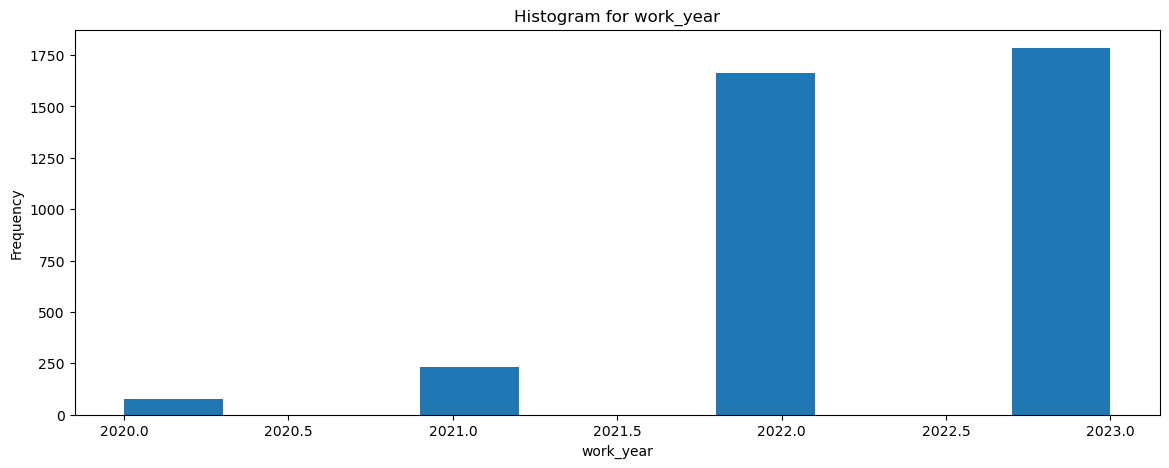

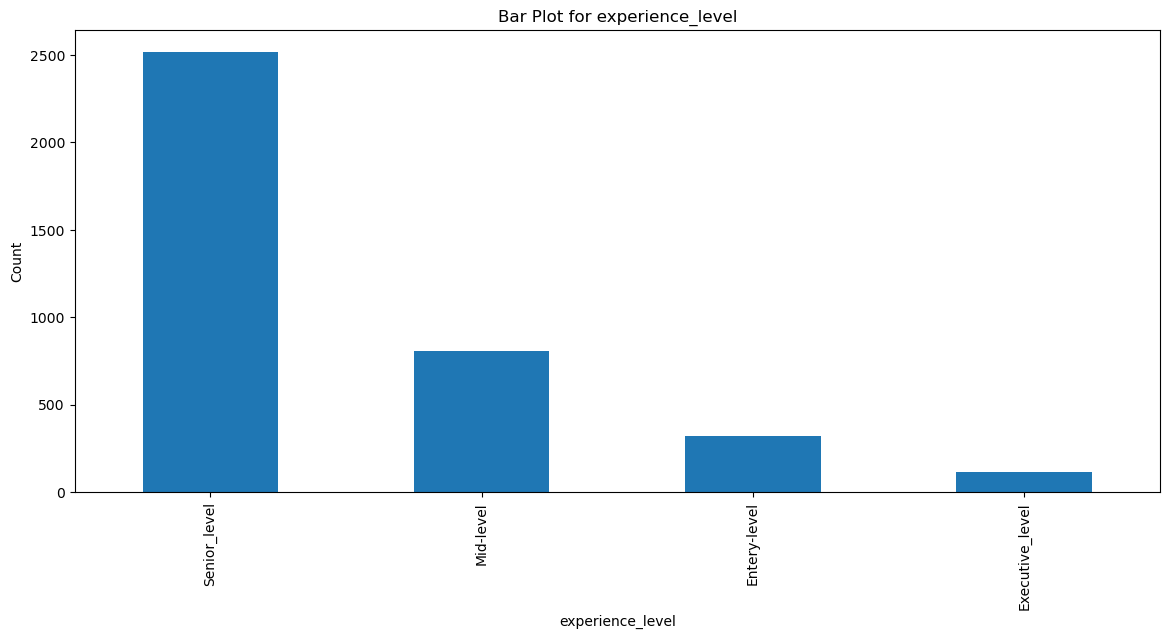

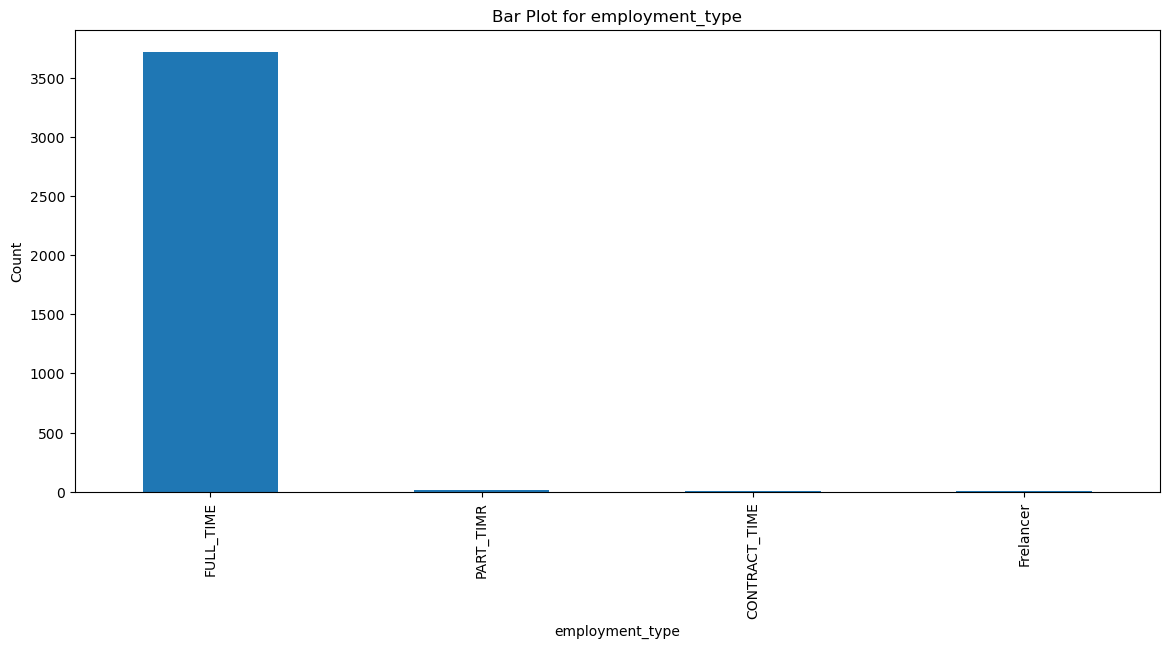

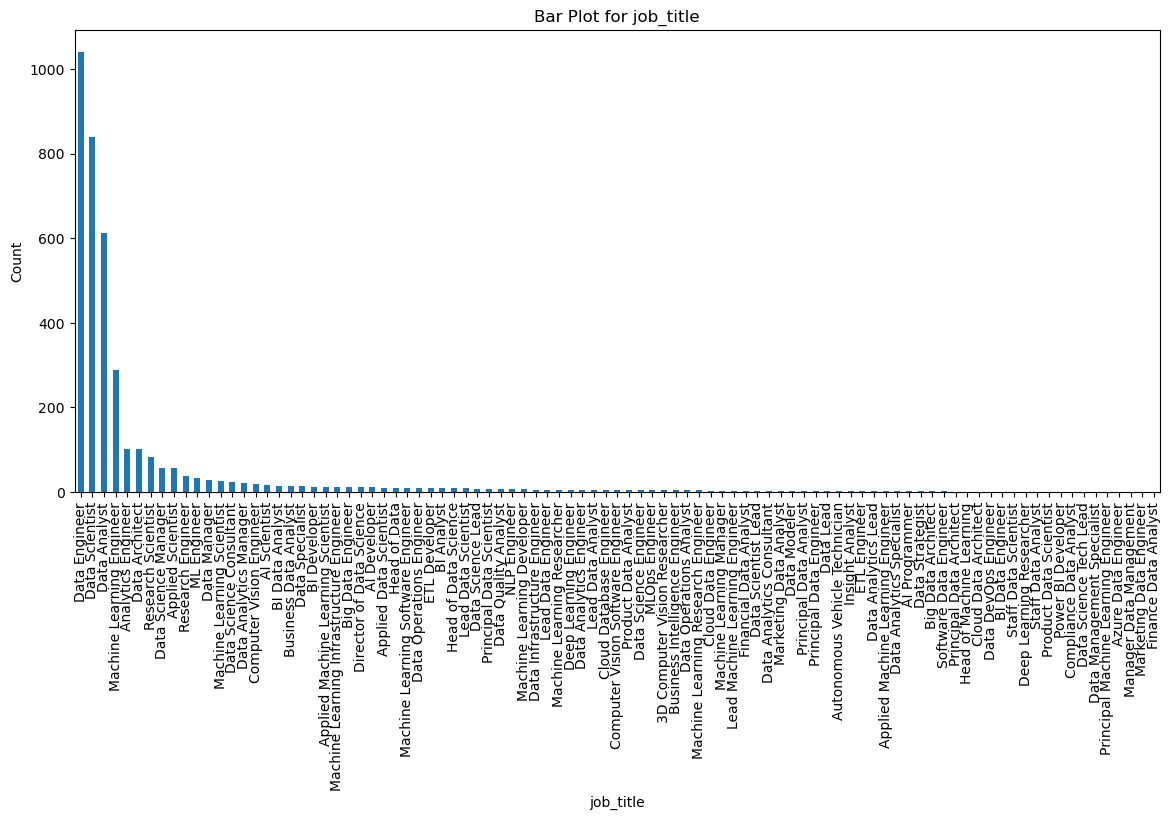

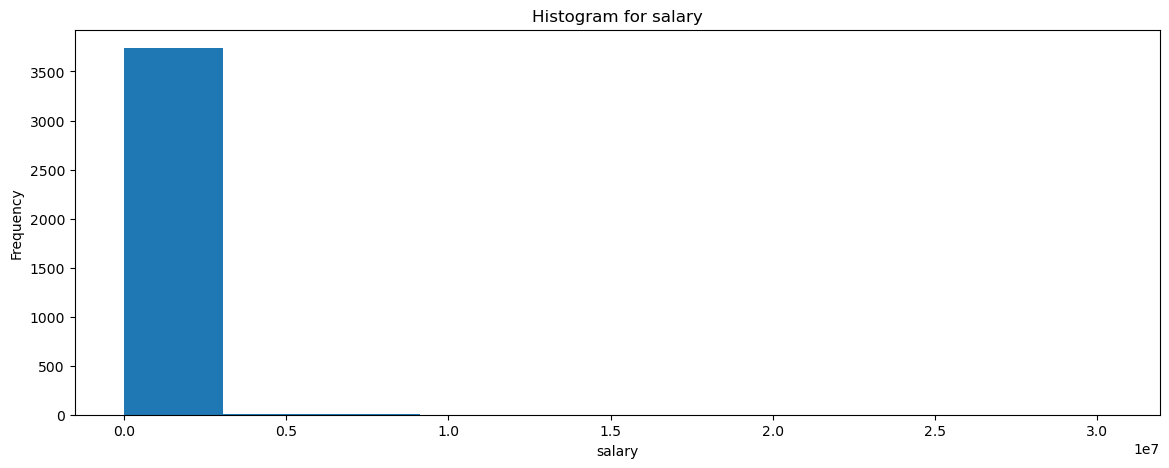

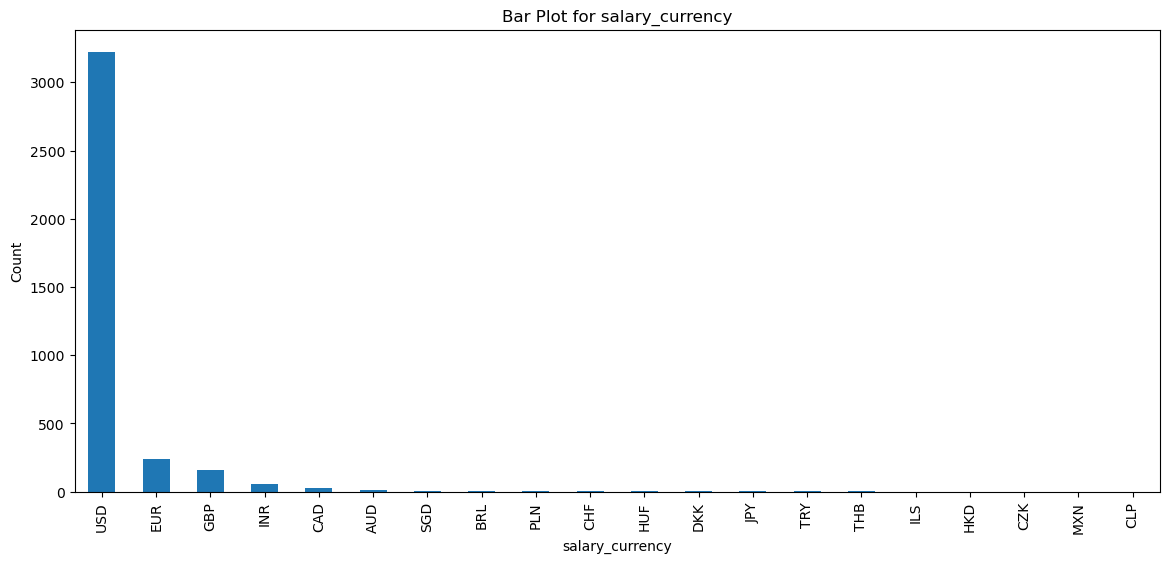

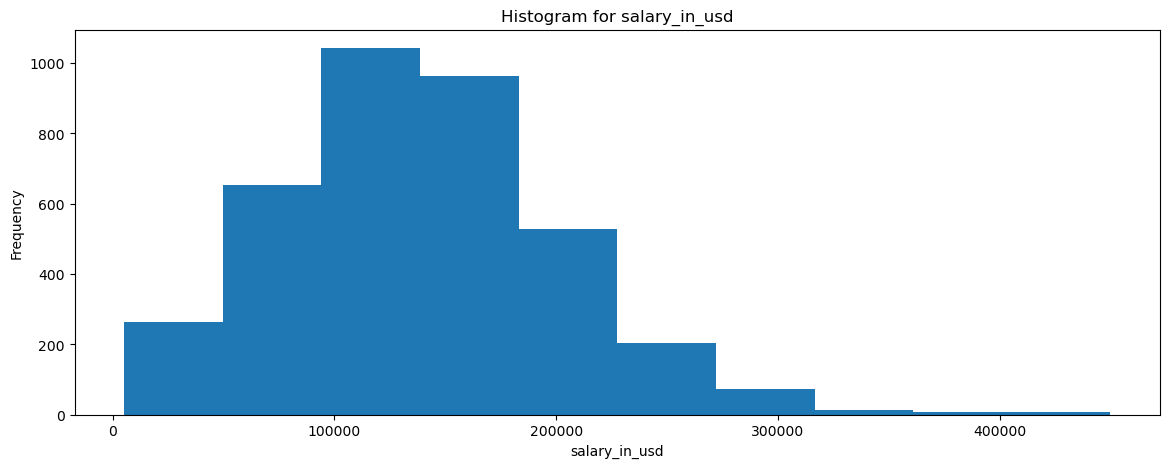

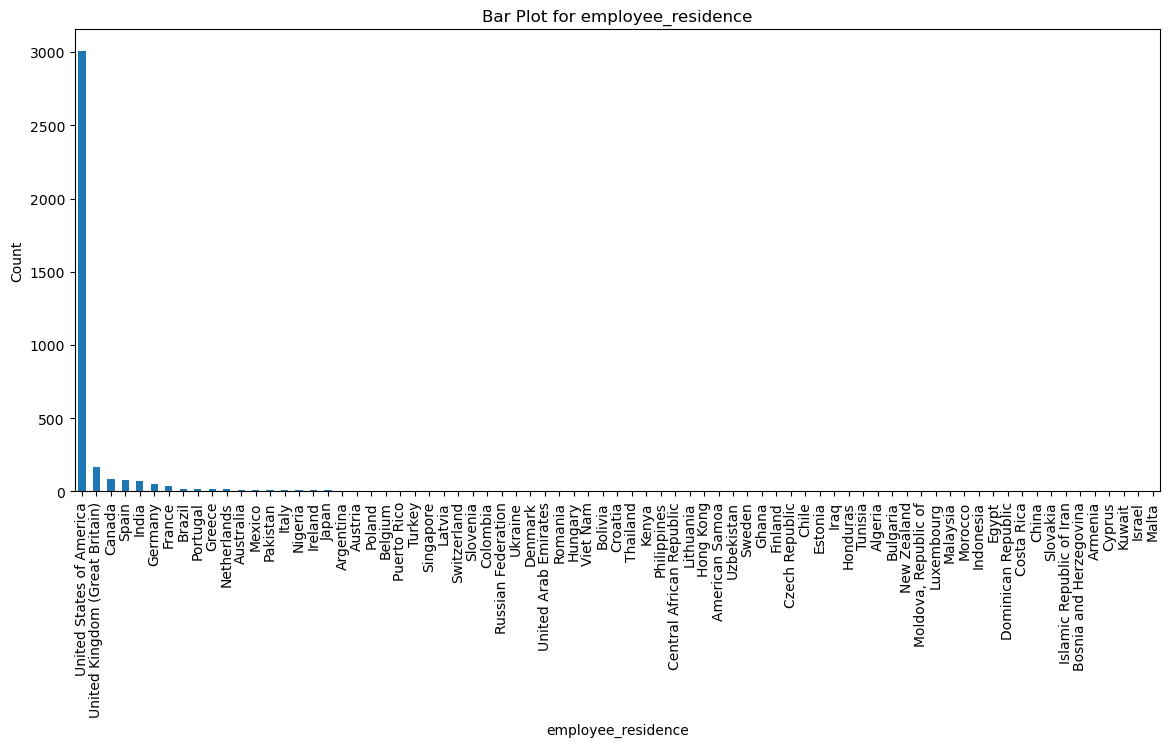

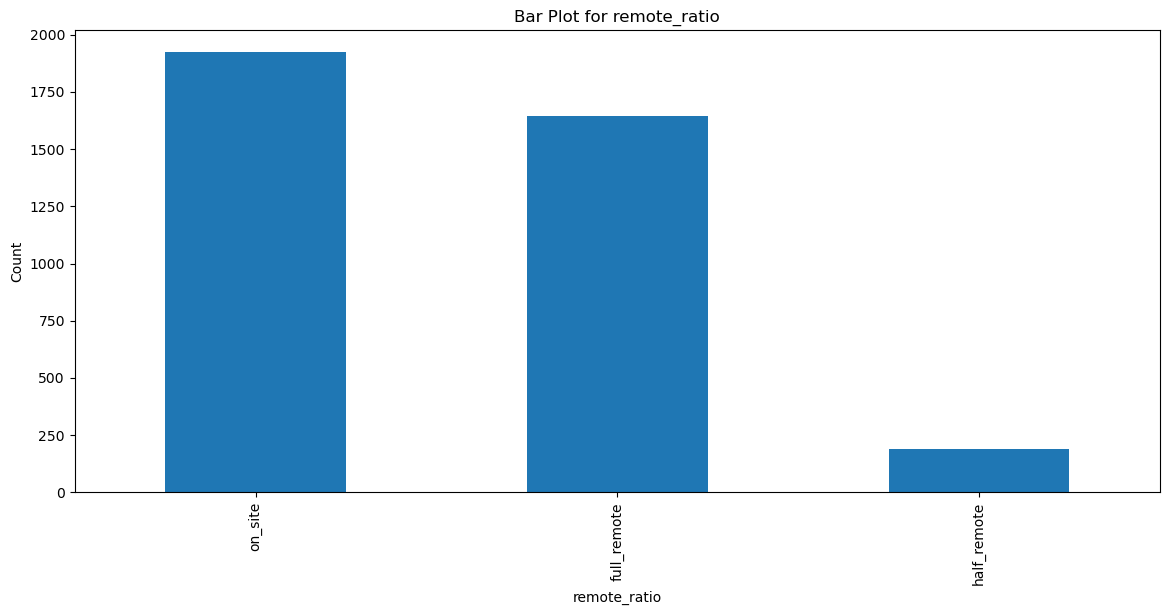

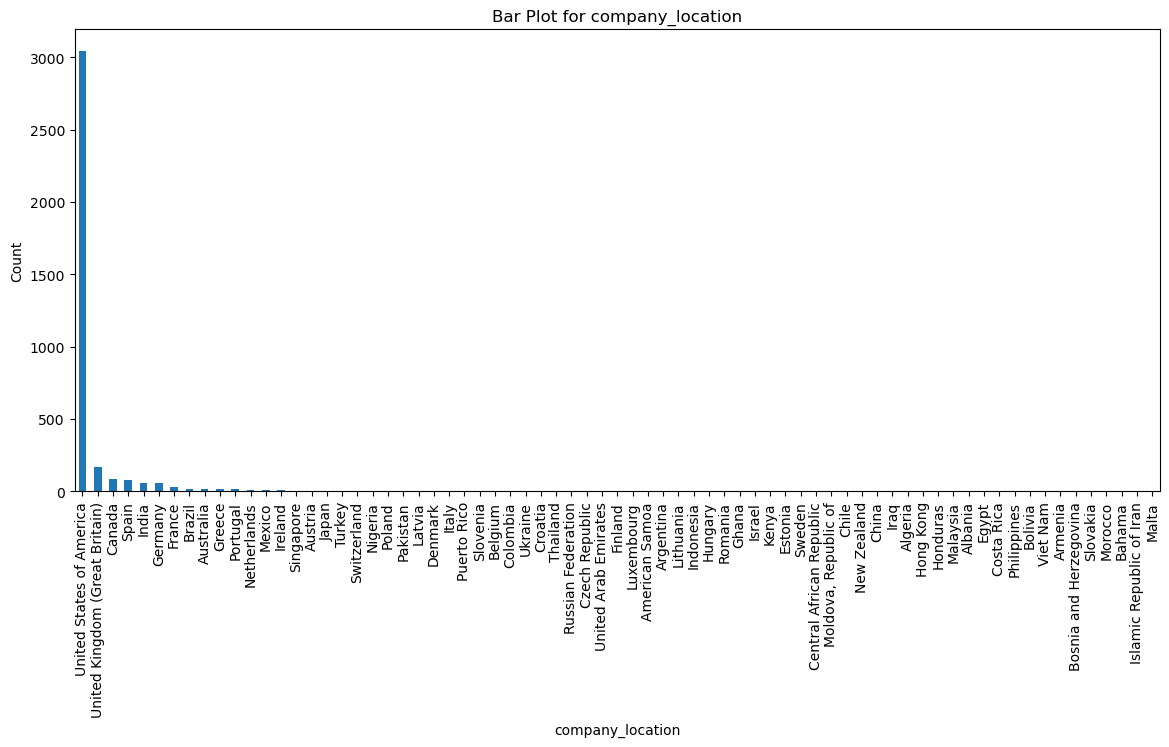

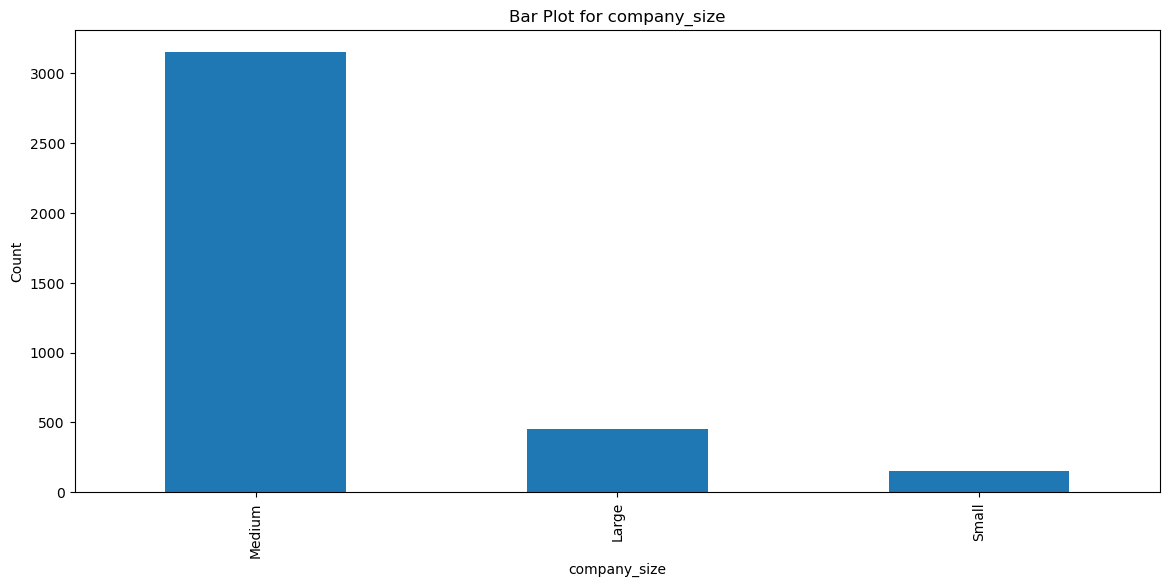

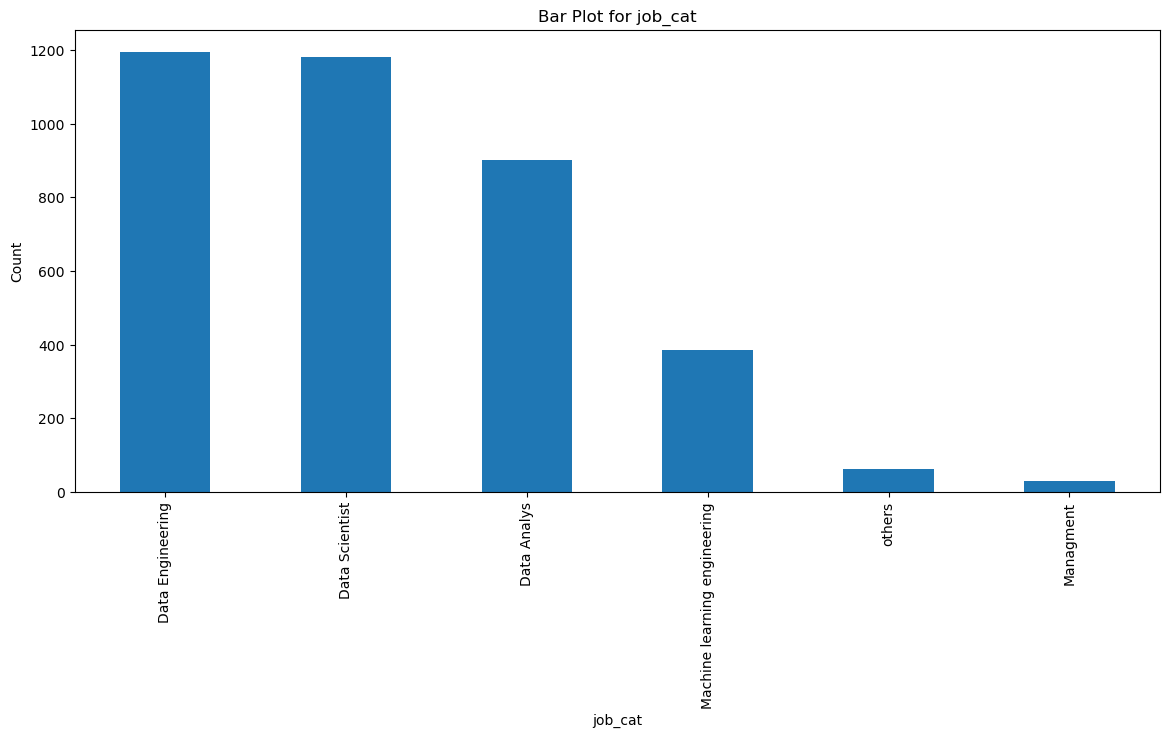

In [316]:
univariate_analysis(df)

## Bivariate Analysis 


In [317]:
pd.crosstab(df["experience_level"],df["salary"],normalize="columns")*100

salary,6000,7000,7500,8000,8760,9272,10000,12000,13000,13400,...,4460000,4900000,5000000,6000000,6600000,7000000,7500000,8500000,11000000,30400000
experience_level,,,,,,,,,,,,,,,,,,,,,
Entery-level,100.0,100.0,0.0,0.0,100.0,100.0,60.0,75.0,100.0,100.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
Executive_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
Mid-level,0.0,0.0,100.0,50.0,0.0,0.0,20.0,12.5,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,50.0,0.0,100.0,100.0,100.0
Senior_level,0.0,0.0,0.0,50.0,0.0,0.0,20.0,12.5,0.0,0.0,...,100.0,100.0,0.0,0.0,0.0,50.0,100.0,0.0,0.0,0.0


In [318]:
pd.crosstab(df["experience_level"],df["employment_type"],normalize="columns")*100

employment_type,CONTRACT_TIME,FULL_TIME,Frelancer,PART_TIMR
experience_level,,,,
Entery-level,20.0,8.122647,20.0,82.352941
Executive_level,10.0,3.039268,0.0,0.000000
Mid-level,50.0,21.301775,50.0,17.647059
Senior_level,20.0,67.536310,30.0,0.000000


In [319]:
pd.crosstab(df["company_size"],df["employment_type"],normalize="columns")*100

employment_type,CONTRACT_TIME,FULL_TIME,Frelancer,PART_TIMR
company_size,,,,
Large,20.0,11.968800,10.0,35.294118
Medium,40.0,84.427111,50.0,29.411765
Small,40.0,3.604088,40.0,35.294118


<Axes: xlabel='job_cat', ylabel='salary_in_usd'>

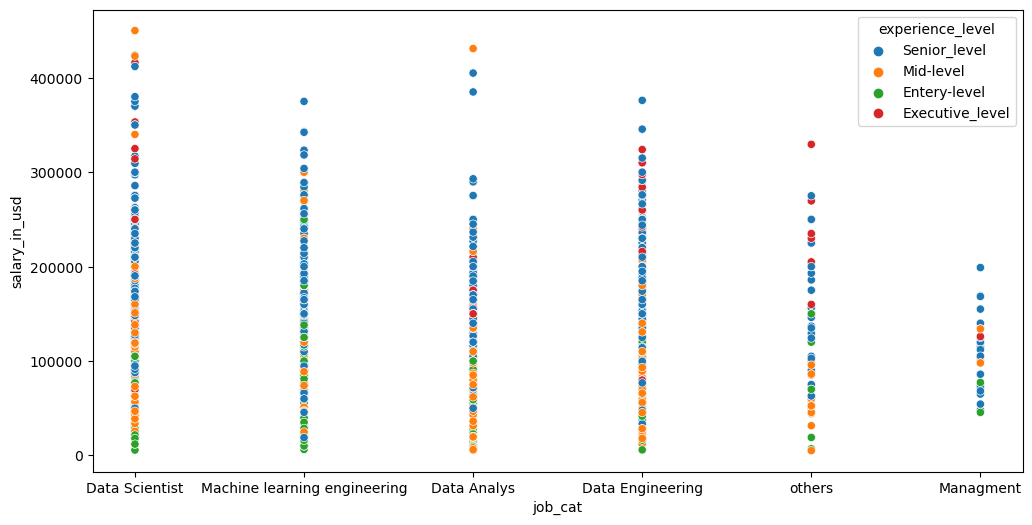

In [320]:

plt.figure(figsize=(12,6))
sns.scatterplot(data =df,x=df["job_cat"],y=df["salary_in_usd"],hue=df["experience_level"])
#plt.scatter(df["job_cat"],df["salary_in_usd"])


## feature engineering 

In [321]:
df=df.drop(columns=["job_title","salary_currency","salary","employee_residence"])

In [322]:
df["salary_in_ind"]=df["salary_in_usd"]*60

C:\Users\hp\AppData\Local\Temp\ipykernel_10776\3888055557.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["salary_in_ind"])


<Axes: xlabel='salary_in_ind', ylabel='Density'>

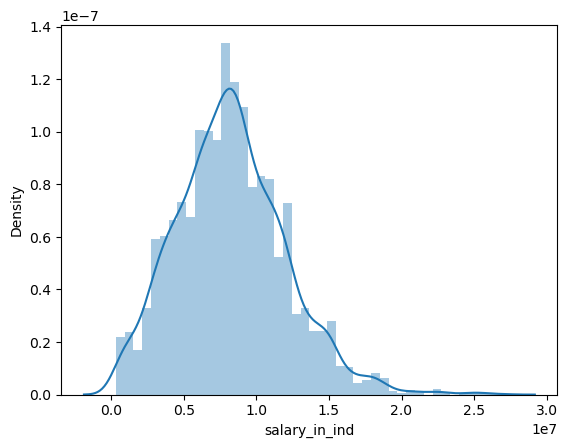

In [323]:
#sns.boxplot(df["salary_in_ind"])
sns.distplot(df["salary_in_ind"])

## Handling the missing Values of the data frame 

In [324]:
highest=df["salary_in_ind"].mean()+3*df["salary_in_ind"].std()
lowest=df["salary_in_ind"].mean()-3*df["salary_in_ind"].std()

In [325]:
df["salary_in_ind"]=np.where(df["salary_in_ind"]>highest,highest,np.where(df["salary_in_ind"]<lowest,lowest,df["salary_in_ind"]))

In [326]:
df.describe()

,work_year,salary_in_usd,salary_in_ind
count,3755.000000,3755.000000,3.755000e+03
mean,2022.373635,137570.389880,8.235735e+06
std,0.691448,63055.625278,3.716318e+06
min,2020.000000,5132.000000,3.079200e+05
25%,2022.000000,95000.000000,5.700000e+06
50%,2022.000000,135000.000000,8.100000e+06
75%,2023.000000,175000.000000,1.050000e+07
max,2023.000000,450000.000000,1.960424e+07


C:\Users\hp\AppData\Local\Temp\ipykernel_10776\2195927219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["salary_in_ind"])


<Axes: xlabel='salary_in_ind', ylabel='Density'>

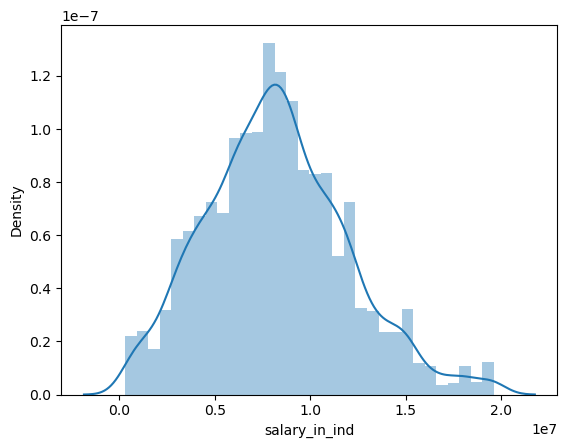

In [327]:
sns.distplot(df["salary_in_ind"])

## Performing Get_dummies function on the Catagorical  Columns

In [328]:
dumies=pd.Series(df["job_cat"])


In [329]:
new_data = pd.get_dummies(dumies,drop_first=True)
new_data=new_data.astype(int)
new_data
df=pd.concat([df,new_data],axis=1)
df=df.drop("job_cat",axis=1)


## created the cleaned file to CSV

In [330]:
df.to_csv("Cleaned_file_csv")


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   work_year                     3755 non-null   int64  
 1   experience_level              3755 non-null   object 
 2   employment_type               3755 non-null   object 
 3   salary_in_usd                 3755 non-null   int64  
 4   remote_ratio                  3755 non-null   object 
 5   company_location              3754 non-null   object 
 6   company_size                  3755 non-null   object 
 7   salary_in_ind                 3755 non-null   float64
 8   Data Engineering              3755 non-null   int32  
 9   Data Scientist                3755 non-null   int32  
 10  Machine learning engineering  3755 non-null   int32  
 11  Managment                     3755 non-null   int32  
 12  others                        3755 non-null   int32  
dtypes: 

In [332]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["company_location","salary_in_ind","salary_in_usd"]),df["salary_in_ind"],test_size=0.3,random_state=60)

In [333]:
X_train.sample(10)

,work_year,experience_level,employment_type,remote_ratio,company_size,Data Engineering,Data Scientist,Machine learning engineering,Managment,others
3553,2021,Entery-level,FULL_TIME,full_remote,Medium,0,0,0,0,0
713,2023,Mid-level,FULL_TIME,full_remote,Large,0,0,0,0,0
1475,2023,Senior_level,FULL_TIME,full_remote,Medium,1,0,0,0,0
2909,2022,Entery-level,FULL_TIME,half_remote,Medium,0,1,0,0,0
302,2023,Senior_level,FULL_TIME,full_remote,Medium,0,1,0,0,0
2313,2022,Senior_level,FULL_TIME,full_remote,Medium,1,0,0,0,0
2898,2022,Senior_level,FULL_TIME,full_remote,Medium,0,0,0,0,0
363,2023,Senior_level,FULL_TIME,full_remote,Medium,0,1,0,0,0
2935,2022,Senior_level,FULL_TIME,full_remote,Medium,0,1,0,0,0
3244,2022,Senior_level,FULL_TIME,full_remote,Medium,0,1,0,0,0


## performing  the ColumnTransformer

In [334]:

tr1=ColumnTransformer(
    transformers=[(("expirence"),OrdinalEncoder(categories=[["Senior_level","Mid-level","Executive_level","Entery-level"]]),[1]),
                  (("employement_type"),OrdinalEncoder(categories=[["FULL_TIME","CONTRACT_TIME","PART_TIMR","Frelancer"]]),[2]),
                 (("remote_ratio"),OrdinalEncoder(categories=[["on_site","half_remote","full_remote"]]),[3]),
    (("company_size"),OrdinalEncoder(categories=[["Large","Medium","Small"]]),[4])],remainder="passthrough")

In [335]:
tr1

ColumnTransformer(remainder='passthrough',
                  transformers=[('expirence',
                                 OrdinalEncoder(categories=[['Senior_level',
                                                             'Mid-level',
                                                             'Executive_level',
                                                             'Entery-level']]),
                                 [1]),
                                ('employement_type',
                                 OrdinalEncoder(categories=[['FULL_TIME',
                                                             'CONTRACT_TIME',
                                                             'PART_TIMR',
                                                             'Frelancer']]),
                                 [2]),
                                ('remote_ratio',
                                 OrdinalEncoder(categories=[['on_site',
                                                             'half_remote',
                                                             'full_remote']]),
                                 [3]),
                                ('company_size',
                                 OrdinalEncoder(categories=[['Large', 'Medium',
                                                             'Small']]),
                                 [4])])

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

tr5=LinearRegression()
tr6=StandardScaler()
t=PowerTransformer("yeo-johnson")


## Created pipeline 

In [337]:
pip1=Pipeline([("tr1",tr1),
               ("tr6",tr6),
               ("t",t),
              ("tr5",tr5)])
             

In [338]:
pip1.fit(X_train,y_train)
y_pred=pip1.predict(X_test)


In [339]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
mse = mean_squared_error(y_test, y_pred)
mse


11054474158131.262

In [340]:
mse

11054474158131.262

In [341]:
MAE=mean_absolute_error(y_test,y_pred)
MAE


2614397.9090011474